# Data
* quantitative
    *qualitative
* discret
    * ordinal
    * nominal
    * categorical data
* continues
    *continues number

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


* X = independent variable
* Y = dependent variable (continues numbers)

In [16]:
data = pd.read_csv("weight-height.csv")
data


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Split data in input and output

In [17]:
X = data.Height.values
Y = data.Weight.values

print(len(X))
print(len(Y))

10000
10000


In [18]:
print(X[0])
print(Y[0])

73.847017017515
241.893563180437


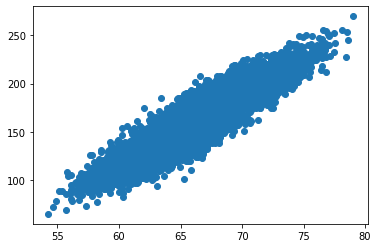

In [6]:
plt.scatter(X,Y)

# Line Function

* Y = WX + B
* Algorithm try to find W,b

In [19]:
def line(w ,x , b=0):
    return w*x + b   

# Loss Function

In [20]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean()) # return single number

C:\Users\Qazi Moawiz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0, 'B')

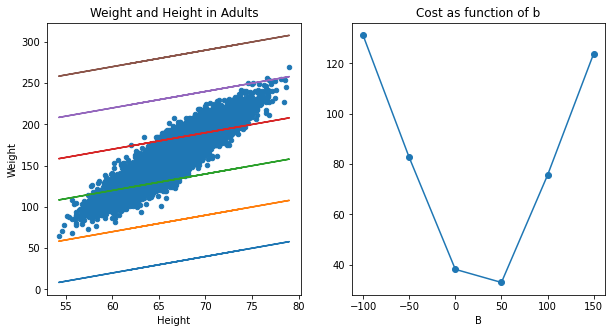

In [21]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
data.plot(kind='scatter',
      x='Height',
      y='Weight',
      title="Weight and Height in Adults",
      ax=ax1)

bs = [-100,-50,0,50,100,150]
mses = []
for b in bs:
    y_pred = line(X,2,b)
    mse = mean_squared_error(Y,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
#     break

ax2 = plt.subplot(122)
ax2.plot(bs,mses,'o-')
plt.title("Cost as function of b")
plt.xlabel("B")

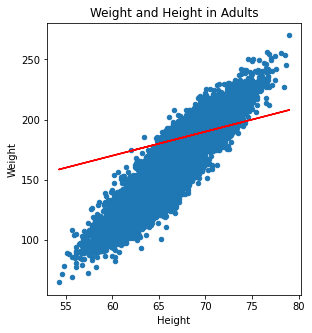

In [24]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
data.plot(kind='scatter',
      x='Height',
      y='Weight',
      title="Weight and Height in Adults",
      ax=ax1)

bs = [50]
mses = []
for b in bs:
    y_pred = line(X,2,b)
    mse = mean_squared_error(Y,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred,'r')
#     break

In [25]:
import tensorflow as tf

In [26]:
print(tf.__version__)

2.11.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam


In [29]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [31]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [34]:
X = df.Height.values	
X[0]

73.847017017515

In [37]:
X= df[["Height"]].values # In Deep learning we take values in the form of array
X[0]

array([73.84701702])

In [39]:
Y_true = df[["Weight"]].values
Y_true[0]

array([241.89356318])

In [41]:
print(X.shape)
print(Y_true.shape)

(10000, 1)
(10000, 1)


In [43]:
X[0].shape # only one index is present

(1,)

In [49]:
display(np.array(272))
display(np.array([1,2,3,4]))
display(np.array([[1,2,4,5],[3,4,5,6]]))

display(np.array(272).ndim)
display(np.array([1,2,3,4]).ndim)
display(np.array([[1,2,4,5],[3,4,5,6]]).ndim)

display(np.array(272).shape)
display(np.array([1,2,3,4]).shape)
display(np.array([[1,2,4,5],[3,4,5,6]]).shape)

array(272)

array([1, 2, 3, 4])

array([[1, 2, 4, 5],
       [3, 4, 5, 6]])

0

1

2

()

(4,)

(2, 4)

# Create Nural Network

In [57]:
print(X[0])
display(X[0].shape)

[73.84701702]


(1,)

# We are use three method here
* Add (help to add layers in sequential model)
* Evaluate (For testing purpose )
* Fit (For training purpose )

In [59]:
model = Sequential()  # create object for sequential

In [60]:
model.add(Dense(1 , input_shape = (1,))) # 1 = no of node go to the next layer. # input_shape =  pass the shape of X[0] 

# Model Summary

In [62]:
model.summary() # it will the summary of model which  are made by us

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Compilation Steps

In [69]:
model.compile(Adam(learning_rate = 0.8) , "mean_squared_error" ) 
# lr =learning rate steps
# in compile we have pass three things( 1 = optimizeer name , 
# 2 = loss function, Every problem has its own loss function, 3 =  Matrix)


# Split Data for training and testing

In [71]:
X_train = X[ : 8000]  # split the Data
X_test = X[8000: ]

Y_train = Y_true[ : 8000]
Y_test = Y_true[8000: ]

In [73]:
print(len(X_train)) 

print(len(X_test))

8000
2000


# Now Start Train the model

In [78]:
model.fit(X_train, Y_train  , batch_size = 128 , epochs=50)

Epoch 1/50
63/63 [==============================] - 0s 1ms/step - loss: 152.4028
Epoch 2/50
63/63 [==============================] - 0s 1ms/step - loss: 158.2260
Epoch 3/50
63/63 [==============================] - 0s 1ms/step - loss: 161.9745
Epoch 4/50
63/63 [==============================] - 0s 1ms/step - loss: 155.1514
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 163.9875
Epoch 6/50
63/63 [==============================] - 0s 1ms/step - loss: 156.5427
Epoch 7/50
63/63 [==============================] - 0s 1ms/step - loss: 154.6834
Epoch 8/50
63/63 [==============================] - 0s 1ms/step - loss: 155.5392
Epoch 9/50
63/63 [==============================] - 0s 1ms/step - loss: 168.6113
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 162.1217
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 159.0372
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 172.6142
Epoch 13/50
63/63 [======

# Test on unseen data
* For to find mean_squared_error from model

In [80]:
model.evaluate(X_test , Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 290.9391


290.93914794921875

# Prediction with model

In [87]:
Y_pred = model.predict(X)
Y_pred

313/313 [==============================] - 0s 1ms/step


array([[227.60568],
       [188.35959],
       [229.64426],
       ...,
       [150.28503],
       [190.31479],
       [135.37921]], dtype=float32)

In [86]:
Y_test

array([[118.51301293],
       [122.56183473],
       [106.78231003],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

C:\Users\Qazi Moawiz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


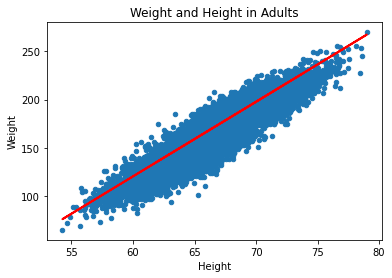

In [88]:
df.plot(kind='scatter',
      x='Height',
      y='Weight',
      title="Weight and Height in Adults"
       )

plt.plot(X , Y_pred , color = "red" , linewidth = 2)

In [89]:
w, b = model.get_weights()

In [90]:
print(w)
print(b)

[[7.748322]]
[-344.58475]


In [91]:
model.predict([240])

1/1 [==============================] - 0s 73ms/step


array([[1515.0126]], dtype=float32)

1/1 [==============================] - 0s 31ms/step


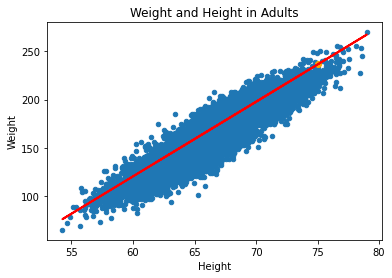

In [99]:
run_height = 75
df.plot(kind='scatter',
      x='Height',
      y='Weight',
      title="Weight and Height in Adults"
       )

plt.plot(X , Y_pred , color = "red" , linewidth = 2)

plt.scatter(x=run_height ,  y = model.predict([run_height]), color = "orange")